# Validation of method

### Table of contents

1. [**Schematic of models**](#schem)
2. [**Synthetic**](#syn)
3. [**Biophysical**](#bio)
4. [**Place cells regression**](#place)
5. [**Place cells comodulation**](#corr)

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy

import equinox as eqx
import jax
import jax.numpy as jnp
import jax.random as jr

import optax
jax.config.update('jax_platform_name', 'cpu')
#jax.config.update("jax_enable_x64", True)

import pickle


import sys

sys.path.append("../../../GaussNeuro")
import gaussneuro as lib

sys.path.append("../../scripts/fit")

import template



import matplotlib.pyplot as plt
plt.style.use(['paper.mplstyle'])
#plt.rc('text', usetex=True)

/var/home/dl543/Documents/Learning/nonparametric-modulated-renewal/scripts/plots/../../../GaussNeuro/gaussneuro/likelihoods/renewal.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
jax.config.update('jax_platform_name', 'cpu')
#jax.config.update('jax_disable_jit', True)

double_arrays = False

if double_arrays:
    jax.config.update("jax_enable_x64", True)
    array_type = "float64"
else:
    array_type = "float32"

# seed everything
seed = 123
prng_state = jr.PRNGKey(seed)
rng = np.random.default_rng(seed)

In [6]:
results['tuning'].keys()

dict_keys(['pos_x_locs', 'ISI_xs_conds', 'ISI_neuron_conds', 'ISI_t_eval', 'unit_ISI_t_eval', 'GT', 'syn_data_seed123ISI4sel0.0to1.0_PP-log__factorized_gp-16-1000_X[x-y]_Z[]_freeze[]', 'syn_data_seed123ISI4sel0.0to1.0_gamma-log__rate_renewal_gp-16-1000jointsamples_X[x-y]_Z[]_freeze[]', 'syn_data_seed123ISI4sel0.0to1.0_PP-log_rcb-8-10.-20.-4.5-9.-self-H150_factorized_gp-16-1000_X[x-y]_Z[]_freeze[obs_model0spikefilter0a-obs_model0spikefilter0log_c-obs_model0spikefilter0phi]', 'syn_data_seed123ISI4sel0.0to1.0_isi4__nonparam_pp_gp-48-matern32-matern32-1000-n2._X[x-y]_Z[]_freeze[]', 'syn_data_seed123ISI4sel0.0to1.0_isi4__nonparam_pp_gp-48-matern32-matern32-1000-n2._X[x-y]_Z[]_freeze[obs_model0log_warp_tau]'])

In [12]:
import plot_baselines

jitter = 1e-5
dt = 0.001

datadir = '../saves/'
name = 'synthetic_results'

results = pickle.load(
    open(datadir + name + ".p", "rb")
)

tuning_dict, regression_dict = results["tuning"], results["regression"]
reg_config_names = list(regression_dict.keys())

    
titles = [
    'true rate maps',
    'Poisson', 
    'rescaled gamma', 
    'conditional Poisson', 
]
tuning_names = ['GT'] + reg_config_names[:3]

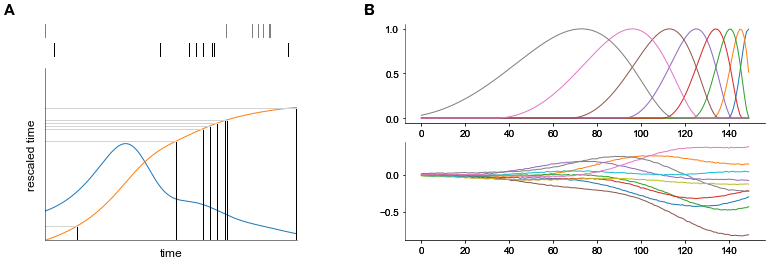

In [49]:
fig = plt.figure(figsize=(10, 3))



fig.text(-0.05, 1.05, 'A', fontsize=15, ha='center', fontweight='bold')
plot_baselines.plot_rate_rescaling(fig, rng, dt, p = 0.003, ts = 3000)


fig.text(0.45, 1.05, 'B', fontsize=15, ha='center', fontweight='bold')
plot_baselines.plot_spike_history_filters(fig, rng, prng_state, jitter, array_type, filter_conf=0)


fig.text(0.45, 1.05, 'C', fontsize=15, ha='center', fontweight='bold')
plot_baselines.plot_rate_maps(fig, tuning_dict, tuning_names, titles)




#plt.savefig('../saves/baselines.pdf')
plt.show()

In [51]:
import plot_BNPP_checks

datadir = '../saves/'
name = 'synthetic_results'

results = pickle.load(
    open(datadir + name + ".p", "rb")
)

tuning_dict, regression_dict = results["tuning"], results["regression"]
reg_config_names = list(regression_dict.keys())

syn_names = reg_config_names[-2:]



datadir = '../saves_/'
name = 'results_th1'

results = pickle.load(
    open(datadir + name + ".p", "rb")
)


regression_dict = results["regression"]
tuning_dict = results["tuning"]


th1_names = [
    
]


hc3_names = [
    
]

<ErrorbarContainer object of 3 artists>

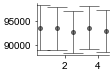

In [280]:
fig = plt.figure(figsize=(10, 4))



fig.text(-0.05, 1.05, 'A', fontsize=15, ha='center', fontweight='bold')
plot_BNPP_checks.plot_BNPP_checks.plot_ARDs(fig)


fig.text(0.35, 1.05, 'B', fontsize=15, ha='center', fontweight='bold')
plot_BNPP_checks.plot_BNPPs(fig)


fig.text(0.65, 1.05, 'C', fontsize=15, ha='center', fontweight='bold')
plot_BNPP_checks.plot_BNPPs(fig)



plt.show()

## th1

In [38]:
import plot_real

In [52]:
datadir = '../saves_/'
name = 'results_th1'

results = pickle.load(
    open(datadir + name + ".p", "rb")
)


regression_dict = results["regression"]
tuning_dict = results["tuning"]
variability_dict = results["variability"]

reg_config_names = list(regression_dict.keys())
    
    
plot_units = [5, 27]

In [41]:
cs = [
    'tab:blue',
    'tab:orange', 
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:brown',
    'tab:gray',
]
use_model_inds = np.array([0, 1, 2, 3, 4, 5, 9])
use_reg_config_names = [reg_config_names[k] for k in use_model_inds]
use_names = [
    'Poisson', 
    'gamma', 
    'log normal', 
    'inverse \nGaussian', 
    'conditional \nPoisson', 
    'conditional \nlog normal', 
    'NP (ours)', 
]
visualize_inds = [0, 2, 4, 5, 6]
visualize_names = [reg_config_names[k] for k in use_model_inds[visualize_inds]]

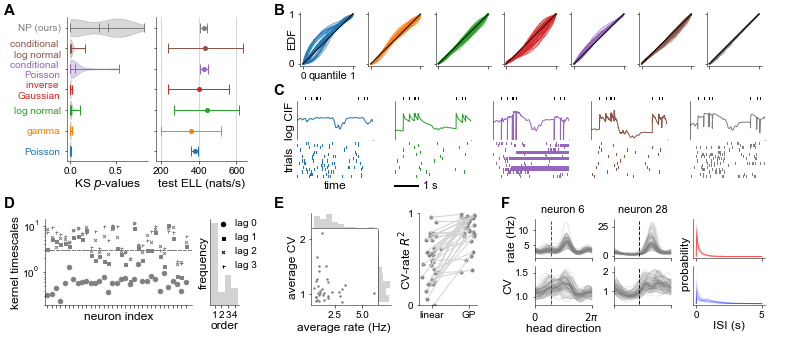

In [36]:
fig = plt.figure(figsize=(10, 4))
fig.set_facecolor('white')

  
fig.text(-0.05, 1.01, 'A', fontsize=15, ha='center', fontweight='bold')
plot_real.plot_fit_stats(fig, 0., 0., regression_dict, use_reg_config_names, use_names, cs)

fig.text(0.325, 1.01, 'B', fontsize=15, ha='center', fontweight='bold')
plot_real.plot_QQ(fig, 0., 0.02, regression_dict, use_reg_config_names, cs)

fig.text(0.325, 0.73, 'C', fontsize=15, ha='center', fontweight='bold')
plot_real.plot_posteriors(fig, 0., 0., regression_dict, visualize_names, visualize_inds, cs)

fig.text(-0.05, 0.34, 'D', fontsize=15, ha='center', fontweight='bold')
plot_real.plot_kernel_lens(fig, 0., 0., tuning_dict)

fig.text(0.325, 0.34, 'E', fontsize=15, ha='center', fontweight='bold')
plot_real.plot_instantaneous(fig, 0., 0., rng, variability_dict, plot_units)

fig.text(0.64, 0.34, 'F', fontsize=15, ha='center', fontweight='bold')
plot_real.plot_th1_tuning(fig, 0., 0., tuning_dict, plot_units)

fig.text(1.02, 1.01, 'S', fontsize=15, alpha=0., ha='center')  # space


    

plt.savefig('../saves/th1.pdf')
plt.show()

In [63]:
import plot_real_details

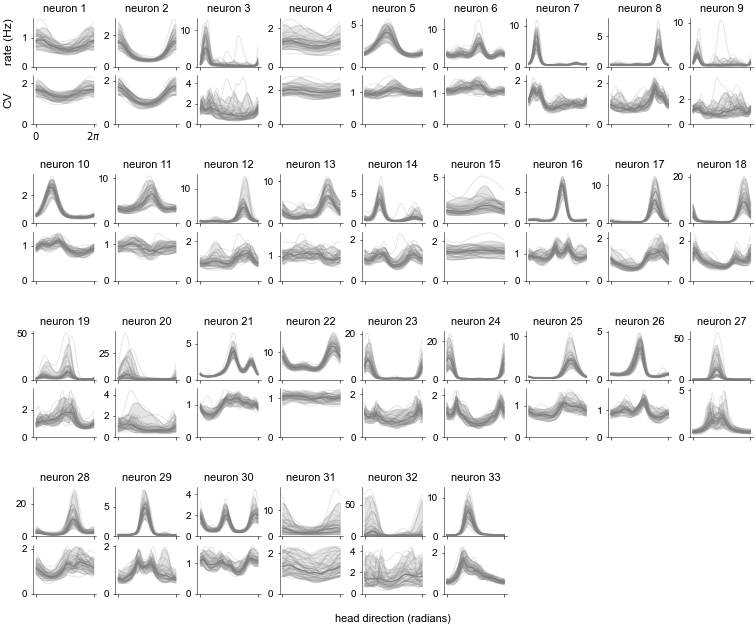

In [86]:
fig = plt.figure(figsize=(10, 8))
fig.set_facecolor('white')

plot_real_details.plot_th1_tuning(fig, tuning_dict)


plt.show()

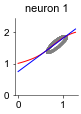

In [ ]:
fig = plt.figure(figsize=(10, 8))
fig.set_facecolor('white')

plot_real_details.plot_instantaneous(fig, variability_dict)


plt.show()

## hc3

In [37]:
datadir = '../saves/'
name = 'results_hc3'

results = pickle.load(
    open(datadir + name + ".p", "rb")
)


regression_dict = results["regression"]
tuning_dict = results["tuning"]
variability_dict = results["variability"]

reg_config_names = list(regression_dict.keys())

    
    
plot_units = [5, 27]

EOFError: Ran out of input

In [ ]:
cs = [
    'tab:blue',
    'tab:orange', 
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:brown',
    'tab:pink',
    'tab:gray',
]
use_model_inds = np.array([0, 1, 2, 3, 4, 6])
use_reg_config_names = [reg_config_names[k] for k in use_model_inds]
use_names = [
    'Poisson', 
    'gamma', 
    'log normal', 
    'inverse \nGaussian', 
    'conditional \nPoisson', 
 #   'conditional \nlog normal', 
    'NP (ours)', 
]
visualize_inds = [0, 2, 4, 5]
visualize_names = [reg_config_names[k] for k in use_model_inds[visualize_inds]]


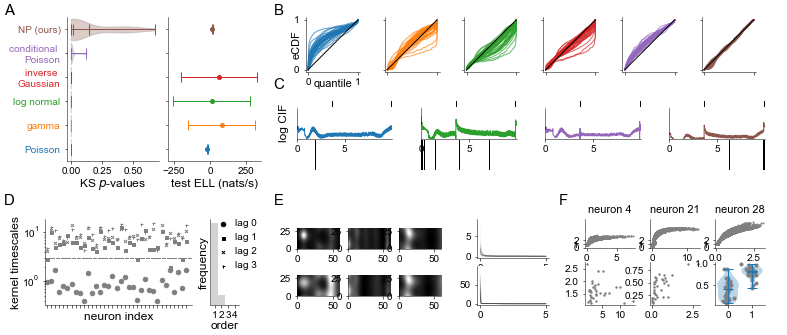

In [851]:
fig = plt.figure(figsize=(10, 4))
fig.set_facecolor('white')


    

fig.text(-0.05, 1.01, 'A', fontsize=15, ha='center', fontweight='bold')
plot_real.plot_fit_stats(fig, 0., 0., regression_dict, use_reg_config_names, use_names, cs)

fig.text(0.325, 1.01, 'B', fontsize=15, ha='center', fontweight='bold')
plot_real.plot_QQ(fig, 0., 0.02, regression_dict, use_reg_config_names, cs)

fig.text(0.325, 0.72, 'C', fontsize=15, ha='center', fontweight='bold')
plot_real.plot_posteriors(fig, 0., 0., regression_dict, visualize_names, visualize_inds, cs)

fig.text(-0.05, 0.35, 'D', fontsize=15, ha='center', fontweight='bold')
plot_real.plot_kernel_lens(fig, 0., 0., tuning_dict)

fig.text(0.325, 0.35, 'E', fontsize=15, ha='center', fontweight='bold')
plot_real.plot_instantaneous(fig, 0., 0., rng, variability_dict, plot_units)

fig.text(0.72, 0.35, 'F', fontsize=15, ha='center', fontweight='bold')
plot_real.plot_hc3_tuning(fig, 0., 0., tuning_dict, plot_units)

fig.text(1.02, 1.01, 'S', fontsize=15, alpha=0., ha='center')  # space
    

    

#plt.savefig('../saves/hc3.pdf')
plt.show()